In [198]:
# install dependencies

# uncomment followinglines if needed
# ! pip3 install numpy
# ! pip3 install pandas
# ! pip3 install seaborn
# ! pip3 install sklearn
# ! pip3 install scipy
! pip3 install statsmodels

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [199]:
# import libraries and read data

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [200]:
raw_data = pd.read_csv("diamonds.csv")
data = raw_data
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Description

### Carat
Carat is the unit of measurement for the physical weight of diamonds.

### Depth
The depth of a diamond refers to its measurement from top to bottom, from the table on the top of the diamond to the culet at its base.

### Table
A diamond's table is the flat, square-shaped facet on its top.


### Price
Price in USD.

### Cut
The GIA diamond cut grade is based on seven factors: brightness, fire, scintillation, weight ratio, durability, polish and symmetry.

In [201]:
set(data['cut'])

{'Fair', 'Good', 'Ideal', 'Premium', 'Very Good'}

### Color
Colored diamonds contain interstitial impurities or structural defects that cause the coloration; pure diamonds are perfectly transparent and colorless. (This fact will be checked in the second chapter)

The 12 colors are yellow, pink, blue, green, orange, champagne, violet, gray, purple, red, fancy black, fancy white.

In [202]:
set(data['color'])

{'D', 'E', 'F', 'G', 'H', 'I', 'J'}

from J (worst) to D (best)

### Clarity

A measureent of how clear the diamond is.

I: Included

IF: Internally flawless

SI: Slightly Included

VS: Very Slightly Included

VVS: Very Very Slightly Included

In [203]:
set(data['clarity'])

{'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'}

### X, Y, Z
Length, width and depth in mm

# 1-1: Preprocessing

In [204]:
# we'll drop useless columns

data = data.drop('Unnamed: 0', axis=1)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [205]:
# check if there is any null value in the data
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Converting descriptive features to numerics

In [206]:
cut_to_int = { 
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

clarity_levels = ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF']
clarity_to_int = { clarity_levels[i]: i+1 for i in range(0, len(clarity_levels)) }
print(clarity_to_int)

{'I1': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7, 'IF': 8}


In [207]:
data['cut'] = data['cut'].apply(cut_to_int.get)
data['clarity'] = data['clarity'].apply(clarity_to_int.get)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,E,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,I,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,J,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,D,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,D,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,D,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,H,3,61.0,58.0,2757,6.15,6.12,3.74


In [208]:
# drop useless columns

data['xy'] = data[['x', 'y']].max(axis=1)
data = data.drop(columns=['x','y'])
data.head()

,carat,cut,color,clarity,depth,table,price,z,xy
0,0.23,5,E,3,61.5,55.0,326,2.43,3.98
1,0.21,4,E,2,59.8,61.0,326,2.31,3.89
2,0.23,2,E,4,56.9,65.0,327,2.31,4.07
3,0.29,4,I,5,62.4,58.0,334,2.63,4.23
4,0.31,2,J,3,63.3,58.0,335,2.75,4.35


replace categorical columns with numerical

In [209]:
data = pd.get_dummies(data)
data.head()

,carat,cut,clarity,depth,table,price,z,xy,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,5,3,61.5,55.0,326,2.43,3.98,0,1,0,0,0,0,0
1,0.21,4,2,59.8,61.0,326,2.31,3.89,0,1,0,0,0,0,0
2,0.23,2,4,56.9,65.0,327,2.31,4.07,0,1,0,0,0,0,0
3,0.29,4,5,62.4,58.0,334,2.63,4.23,0,0,0,0,0,1,0
4,0.31,2,3,63.3,58.0,335,2.75,4.35,0,0,0,0,0,0,1


# 1-2

Correlation map between columns

In [210]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap='coolwarm', annot=True)
plt.show()

KeyboardInterrupt: 

# 1-3 Plot some charts

Pair plot

In [ ]:
correlated_columns = ['carat', 'xy', 'z', 'price']
other_columns = ['clarity', 'depth', 'table']
cols = correlated_columns + other_columns
data_to_be_pairplotted = data[cols].sample(400)
# could've also specified hue
graph = sns.pairplot(data_to_be_pairplotted, markers='+')
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))
indices = [(i,j) for i in range(2) for j in range(2)]
for col, i in zip(['cut', 'carat', 'clarity', 'xy'], indices):
    axs[i].hist(data[col])
    axs[i].set_title(col + ' histogram')
plt.show()

In [ ]:
# could've also plotted scatter plots

## Outlier detection and drop

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(data['carat'])

In [ ]:
plt.scatter(data['z'], data['price'])

In [ ]:
data = data[data['z'] <= 6.6]
data = data[2 <= data['z']]

In [ ]:
plt.scatter(data['z'], data['price'])

In [ ]:
plt.scatter(data['depth'], data['price'])

In [ ]:
data = data[data['depth'] >= 52]
data = data[data['depth'] <= 73]
plt.scatter(data['depth'], data['price'])

In [ ]:
plt.scatter(data['carat'], data['price'])

In [ ]:
data = data[data['carat'] <= 3.1]
plt.scatter(data['carat'], data['price'])

In [ ]:
plt.scatter(data['table'], data['price'])

In [ ]:
data = data[49 <= data['table']]
data = data[data['table'] <= 72]
plt.scatter(data['table'], data['price'])

In [ ]:
from functools import reduce

def outlier_remover(data, labels, threshold=4):
    '''
    threshold: multiplier of standard deviation to tolerate
    '''
    
    drop = []
      
    def clean(label):
        x = data[label].to_numpy()
        µ = x.mean()
        s = x.std()
        
        # normalized
        n = (x - µ)/s
        
        drop.append(np.where(n >= threshold)[0])
        drop.append(np.where(n <= -threshold)[0])

    for lbl in labels:
        clean(lbl)
    
    
    to_drop = np.unique(np.array(reduce(lambda x,y: list(x)+list(y), drop)))

    return data.drop(to_drop)

data = outlier_remover(data, ['carat', 'table', 'depth', 'z', 'price'])


In [ ]:
data.reset_index()
data

In [ ]:
raw_data.head()

Let's see color distribution of diamonds

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='carat', y='price', data=raw_data.sample(2000), hue='color', ec=None)

A closer look

In [ ]:
d = raw_data.sample(700)
plt.figure(figsize=(10,10))
sns.scatterplot(x='carat', y='price', data=d[d['carat'] < 2.3], hue='color', ec=None)

# 1-4 Diamond Price Prediction

The problem: predicting price of a diamond

In [ ]:
# split data between features and target

def split_feature_target(data, label):
    features = data.drop(label, axis=1)
    target = data[label]
    return features, target

# scale data tools

from sklearn.preprocessing import StandardScaler # using MinMaxScaler after splitting would cause problems because of possible oulier data
scaler = StandardScaler()

features, target = split_feature_target(data, 'price')


def scale_data(data):
    return pd.DataFrame(scaler.fit_transform(data))

def preprocess(data):
    '''
    returns scaled train data and test data
    '''

    # split data between train and test

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 1234)

    
    X_train = scale_data(X_train)
    X_test = scale_data(X_test)


    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(data)

X_train

## Testing different models

In [ ]:
model_scores = {}

## Linear Regression

r2: coefficient of determination of the prediction

rss = residual sum of squares

tss = total sum of squares

r2 = $1 - \frac{rss}{tss}$


In [ ]:
# could append a column of ones like this but it is done automatically anyway
# X = np.hstack((np.array(X_train), np.ones(shape=(len(X),1))))
X = X_train
y = y_train

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

# r2 score
model_scores['LR'] = linreg.score(X_test, y_test)
model_scores['LR']

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

N = 10
scores = np.zeros(shape=(N+1))
for n in range(1,N+1):
    knr = KNeighborsRegressor(n_neighbors=n)
    knr.fit(X_train, y_train)
    scores[n] = knr.score(X_test, y_test)

In [ ]:
scores

In [ ]:
plt.ylabel('score')
plt.xlabel('neighbors')
plt.plot(np.arange(1, N+1), scores[1:])
plt.show()

In [ ]:
i = np.argmax(scores)
print(f'chose neighbors={i} as hyperparamter')
print('score:', scores[i])

model_scores['KNN'] = scores[i]

## Lasso
The Lasso is a linear model that estimates sparse coefficients with l1 regularization.

In [ ]:
from sklearn.linear_model import Lasso

N = 40
x = N//2
for step in [2, 1, 0.5, 0.1]:
    scores = np.zeros(N)
    begin = max(int(x - N/4*step), 0)
    end = min(int(x + N/4*step), N)
    
    alpha_list = np.arange(begin, end, step)
    for i,alpha in enumerate(alpha_list):
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)
        scores[i] = lasso.score(X_test, y_test)
    
    print('scores:', [round(x, 4) for x in set(scores)])
    i = np.argmax(scores)
    x = alpha_list[i]
    print('x:', x, 'score: ', scores[i])

The best value of alpha=0 implies Lasso is no better than linear reggression in this case

In [ ]:
model_scores['Lasso'] = scores[i]

## Random Forest
not tested

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1234)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
model_scores['DecTreeReg'] = score
score

## SVM Regressor

In [118]:
from sklearn.svm import SVR

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores = np.zeros(len(kernels))

# only using a subset of data because SVM is taking so long
r = np.random.choice(len(y_train), 4000)

for i, kernel in enumerate(kernels):
    model = SVR(kernel=kernel)
    model.fit(X_train.iloc[r], y_train.iloc[r])
    scores[i] = model.score(X_test, y_test)

best = np.argmax(scores)
best_kernel = kernels[best]
best_score = scores[best]

print(f'used kernel of {kernel} with the score of {best_score}')

model_scores['SVM'] = best_score

used kernel of sigmoid with the score of 0.7432113240989363


## Model Scores

In [119]:
model_scores

{'LR': 0.910766134702331,
 'KNN': 0.9619307177583689,
 'Lasso': 0.9107655795849923,
 'DecTreeReg': 0.9642594753774553,
 'SVM': 0.7432113240989363}

In [120]:
best_models = sorted(model_scores.items(), key=lambda item: item[1])[::-1][:2]
print('Best performing models are:', best_models[0], best_models[1])

Best performing models are: ('DecTreeReg', 0.9642594753774553) ('KNN', 0.9619307177583689)


## Note on algorithm comparison:
could've used K-Fold or other kinds of cross-validation to compare learning algorithms and find the best one. 

# 1-5 Implementing KNN

In [194]:
# Implementation of KNN algorithm
# This code also finds the best number of nearest neighbors to consider

# k: number of neighbors
# nearest: matrix of indices of K nearest neighbords of point i'th
# K: k upper limit

from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

pca_ = PCA(n_components= 2)
def pca(X):
    return pca_.fit_transform(X)

def animate(X, y, test, nearest):
    X = pca(X)
    plt.scatter(X[:,0], X[:,1], c=y)
    test = pca(test)
    print(test)
    plt.scatter(test[0], test[1], color=0)
    plt.show()

def knn_transform(nearest, y_train):    
    y_predict = y_train[nearest].mean(axis=1)
    return y_predict

def k_nearest_neighbors(train, test, K):    
    nearest = np.zeros((len(test), K)).astype('int')
    for i,x in enumerate(test):
        d = train - x
        nearest[i, :K] = np.argpartition((d**2).sum(axis=1), K)[:K]

    return nearest
  
def knn(X_train, y_train, X_test, y_test, K, fixedK= False):       
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    
    X_train_pca = pca(X_train)
    X_test_pca = pca(X_test)
    
    nearest = k_nearest_neighbors(X_train, X_test, K)
    nearest.sort(axis=1) 
    
    err = lambda y_predict: ((y_predict - y_test)**2).mean()
        
    if fixedK:
        y_pred = knn_transform(nearest, y_train)
        error = np.sqrt(err(y_pred))
        score = r2_score(y_pred, y_test)
        return y_pred, error , K, [error], [score]
        
    y_predicts = [knn_transform(nearest[:,:k], y_train) for k in range(1,K)]
    errors = np.array([err(y) for y in y_predicts])
    scores = np.array([r2_score(y, y_test) for y in y_predicts])
    
    best = np.argmin(errors)
    return knn_transform(nearest[:,:best], y_train), np.sqrt(errors[best]), best+1, errors, scores
    

In [ ]:
animate(X_train, y_train/y_train.max(), X_test.iloc[0], None)

In [212]:
X_test.iloc[0]

color_D    0
color_E    0
color_F    0
color_G    1
color_H    0
color_I    0
color_J    0
Name: 6357, dtype: uint8

In [ ]:
X = pca(features)
plt.figure(figsize=(15, 10))
plt.scatter(X[:,0], X[:,1])

plt.show()

In [123]:
K = len(features.iloc[0])
y_knn_impl, error, knn_best_k, errors, scores = knn(X_train, y_train, X_test, y_test, K)
print('knn impl error:', error)

knn impl error: 801.0453520788325


In [124]:
print('result:', y_knn_impl)

result: [4076.66666667 5248.91666667  728.83333333 ... 2910.66666667  711.
  806.16666667]


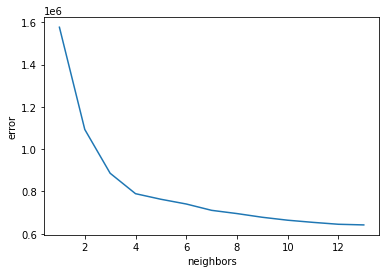

In [125]:
plt.ylabel('error')
plt.xlabel('neighbors')
plt.plot(np.arange(1, K), errors)
plt.show()

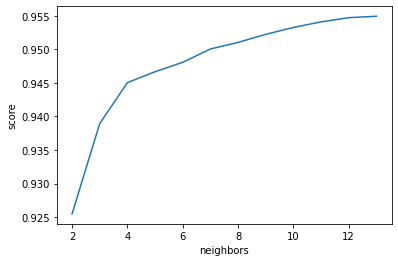

In [126]:
plt.ylabel('score')
plt.xlabel('neighbors')
plt.plot(np.arange(2, K), scores[1:])
plt.show()

In [127]:
print(f'chose k={knn_best_k} as hyperparamter')

chose k=13 as hyperparamter


the model is pretty much over-fitting at this point, I need to find a better way to choose K. In my opinion a value around 5 is better at this point.

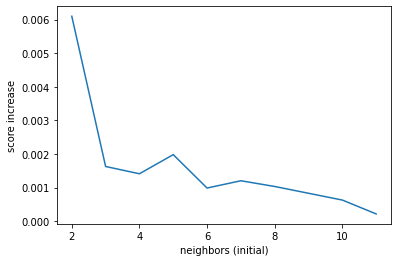

In [128]:
# difference of scores
d = np.array([scores[i]-scores[i-1] for i in range(1, len(scores))])
# plot
plt.ylabel('score increase')
plt.xlabel('neighbors (initial)')
plt.plot(np.arange(2, len(scores)-1), d[2:])
plt.show()

best k: 11


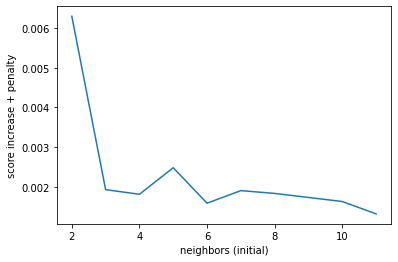

In [129]:
# adding penalty for higher n
d = d + 0.0001 * np.arange(len(d))
print('best k:', np.argmin(d))

# plot
plt.ylabel('score increase + penalty')
plt.xlabel('neighbors (initial)')
plt.plot(np.arange(2, len(scores)-1), d[2:])
plt.show()

We'd want to stop at k=5 because from there, not much score is gained but the computation time gets much more

In [130]:
neighbors = 5

In [131]:
y_knn_impl, error, _, _, _ = knn(X_train, y_train, X_test, y_test, neighbors, fixedK = True)
print('knn impl error:', error)
print('knn impl result:', y_knn_impl)

knn impl error: 783.1448592787902
knn impl result: [4141.4 4713.   705.  ... 2606.2  629.8  754. ]


In [132]:
knn_accurancy = r2_score(y_knn_impl, y_test)*100
print('implementation result accurancy: {:.5f}%'.format(knn_accurancy))

implementation result accurancy: 95.84766%


And now we'll compare it with scikit implementation

In [133]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=neighbors, weights='uniform')
model.fit(X_train, y_train)
y_knn_sk = model.predict(X_test)
y_knn_sk

array([4141.4, 4713. ,  705. , ..., 2606.2,  629.8,  754. ])

In [134]:
from sklearn.metrics import mean_squared_error
knn_error = np.sqrt(mean_squared_error(y_test,y_knn_impl))
knn_error

783.1448592787902

The differece of results of sklearn version:

In [135]:
print(np.abs(y_knn_sk - y_knn_impl))
np.sqrt(mean_squared_error(y_knn_sk,y_knn_impl))

[0. 0. 0. ... 0. 0. 0.]


8.926189230806122

We can observe here that the results are close enough to the scikit implementation.
Also it is more optimized in finidng the best K!

# 1-6 Feature Selection 

We're going to find the most important features using forward and backward sequential techniques.

In [138]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score

fs_scores = {}

for mode in ['forward', 'backward']:
    # init
    model = KNeighborsRegressor(n_neighbors = neighbors)
    # tried using LinearRegression but in that case both the forward and backward algorithms will perform the same
    feature_selector = SequentialFeatureSelector(model, direction=mode)
    
    # select features
    X_train_reduced = feature_selector.fit_transform(X_train, y_train)
    feature_names = feature_selector.get_feature_names_out()
    print(f'{mode} feature selection selected {len(feature_names)} features:', feature_names)
     
    # reduce test's features
    X_test_reduced = feature_selector.transform(X_test)
    
    # fit model
    model.fit(X_train_reduced, y_train)
    
    # predict
    y_predict = model.predict(X_test_reduced)
    
    # eval model
    print('accurancy: {:.5f}%'.format(r2_score(y_predict, y_test)*100))

forward feature selection selected 7 features: ['x0' 'x2' 'x6' 'x10' 'x11' 'x12' 'x13']
accurancy: 97.62698%
backward feature selection selected 7 features: ['x0' 'x2' 'x7' 'x8' 'x11' 'x12' 'x13']
accurancy: 97.43404%


We could see similar results could be captured using feature selection techniques, which shows how good they are.

# 1-7 K-Fold Cross-validation

Find best K using sklearn:

In [139]:
from sklearn.model_selection import cross_validate

X = scale_data(features)

model = KNeighborsRegressor(n_neighbors= neighbors)

# saving the worst case of each k
scores = np.array([cross_validate(model, X, target, cv=k)['test_score'].min() for k in range(2, 14)])
best_k = np.argmin(scores)

print(f'best k is {best_k} with score {scores[best_k]}')

best k is 11 with score -1.659810440528211


Which is close enough to 10 =)

# 1-8 Bootstrap

We'll use linear regression model and bootstrap technique

In [140]:
iterations = 50

def subsample(x, target, factor, replace):
    x_sub = x.sample(frac=factor, replace=replace)
    y_sub = target[x_sub.index]
    return x_sub, y_sub

reg = LinearRegression()

# only keeping 20% of the data
X, Y = subsample(features, target, 0.2, False)

predicts = []

for i in range(iterations):
    x, y = subsample(X, Y, 1, True)
    reg.fit(x, y)
    predicts.append(reg.predict(X_test))

y_pred = np.array(predicts).mean(axis=0)
error = np.sqrt(mean_squared_error(y_pred, y_test))
print('bootstrap error:', error)

bootstrap error: 8152.465905935489


In [141]:
# iterations = 23

# def resample(x, target):
#     print(data.shape)
#     print(target.shape)
#     # train
#     train = x.sample(frac=0.2, replace=True)
#     # test
#     included = train.index
#     print(included)
#     print(np.max(train.index))
#     not_included = np.setdiff1d(np.arange(len(x)), included, assume_unique=False)
#     test = x.iloc[not_included]

#     return train, target.iloc[included], test, target.iloc[not_included]

# scores = np.zeros(iterations)

# for i in range(iterations):
#     X_sample, y_sample, X_sample_test, y_sample_test = resample(features, target)
#     reg = LinearRegression()
#     reg.fit(X_sample, y_sample)
#     scores[i] = reg.score(X_sample_test, y_sample_test)
#     if i%5==0:
#         print(f'iteration: {i}, score: {scores[i]}')

# print(f'mean score: {scores.mean()}')

# bootstrap_score = scores.mean()

# print(f"using bootstrap makes the score {'better' if bootstrap_score > linreg_score else 'worse'}")

# 1-9 Lasso Ridge

We're now going to compare using regularization and compare it with normal linear regression.

In [142]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

alpha = 1
print(f'set alpha: {alpha}')

ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso_score = lasso.score(X_test, y_test)

print('lr:', lr_score)
print('ridge:', ridge_score)
print('lasso:', lasso_score)

better, worse = 'lasso', 'ridge'
if ridge_score > lasso_score:
    better, worse = worse, better
print(f'{better} performed better than {worse}')

set alpha: 1
lr: 0.910766134702331
ridge: 0.9107615958013816
lasso: 0.9106833876441801
ridge performed better than lasso


## Ridge
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients with l2 regularization.
## Lasso
Was exaplined above in the notebook.


# 1-10 Bias Variance Decomposition

Make ensemble model

In [143]:
y.iloc[[0,1,2]]

44928    1632
44032    1547
49262    2088
Name: price, dtype: int64

In [144]:
from sklearn.ensemble import BaggingRegressor

# pick random datapoint
iterations = 50

def get_sample(X, y, frac):
    n = len(X)
    i = np.random.choice(n, int(frac*n))
    return X.iloc[i], y.iloc[i]

n = len(X)
i = np.random.randint(n)

X = scale_data(features)

X_ens = X.drop(i)
y_ens = target.drop(i)

x_test_ens = X.iloc[[i]]
y_test_ens = target.iloc[i]

Y = np.zeros(iterations)

model = BaggingRegressor(n_estimators=12)

for i in range(iterations):
    x, y = get_sample(X_ens, y_ens, 0.5)
    model.fit(x, y)
    Y[i] = model.predict(x_test_ens)

In [145]:
bias = Y.mean() - y_test_ens
print(f'Bias^2 is {round(bias**2, 2)}')

var = ((Y - y_test_ens)**2).mean()
print(f'Variance is {var}')

Bias^2 is 13115.21
Variance is 31019.19415123457


# 2. Unsupervised

# 2-1 PCA

## Two-dimentional

In [146]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

# model = KNeighborsRegressor(n_neighbors= neighbors)
model = LinearRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
pca_accuracy = r2_score(y_test, y_pred)*100
print('PCA accuracy of 2 components is {:.2f}%'.format(pca_accuracy))

PCA accuracy of 2 components is 74.34%


Plotting the data:

<AxesSubplot:>

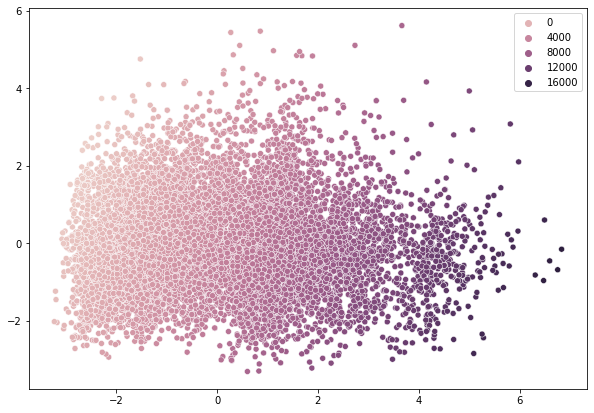

In [147]:
x, y = X_test_pca[:, 0], X_test_pca[:, 1]

fig = plt.figure(figsize=(10, 7))
sns.scatterplot(x, y, hue=y_pred)

## Three-dimentional

In [148]:
pca = PCA(n_components= 3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

# model = KNeighborsRegressor(n_neighbors= neighbors)
model = LinearRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
pca_accuracy = r2_score(y_test, y_pred)*100
print('PCA accuracy of 3 components is {:.2f}%'.format(pca_accuracy))

PCA accuracy of 3 components is 71.83%


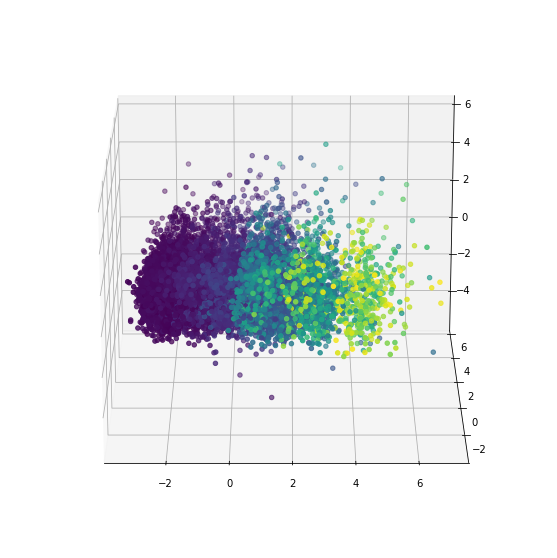

In [149]:
x, y, z = [X_test_pca[:,i] for i in range(3)]

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

# params: elevation angle, azimuth
ax.view_init(20,-90)
ax.scatter3D(x, y, z, c=y_test)

# 2-2 Clustering
Skipping this part because the problem is regression

# 2-3 A Question To Be Asked

Let's take another look at our data

In [150]:
data

,carat,cut,clarity,depth,table,price,z,xy,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,5,3,61.5,55.0,326,2.43,3.98,0,1,0,0,0,0,0
1,0.21,4,2,59.8,61.0,326,2.31,3.89,0,1,0,0,0,0,0
2,0.23,2,4,56.9,65.0,327,2.31,4.07,0,1,0,0,0,0,0
3,0.29,4,5,62.4,58.0,334,2.63,4.23,0,0,0,0,0,1,0
4,0.31,2,3,63.3,58.0,335,2.75,4.35,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,2,60.8,57.0,2757,3.50,5.76,1,0,0,0,0,0,0
53936,0.72,2,2,63.1,55.0,2757,3.61,5.75,1,0,0,0,0,0,0
53937,0.70,3,2,62.8,60.0,2757,3.56,5.68,1,0,0,0,0,0,0
53938,0.86,4,3,61.0,58.0,2757,3.74,6.15,0,0,0,0,1,0,0


## Question 1: What are the most important price facters?

In [151]:
correlations = data.corr()

The following factors are highly [linearly] correlated with price

In [152]:
correlations['price'].sort_values()[::-1][1:]

carat      0.922980
xy         0.883223
z          0.882688
table      0.128451
color_I    0.095731
color_J    0.081679
color_H    0.058878
color_G    0.009459
depth     -0.010906
color_F   -0.024118
cut       -0.053994
color_D   -0.072257
color_E   -0.100633
clarity   -0.104226
Name: price, dtype: float64

## Question 2: How good can you guess the clarity of a diamond by its table, depth, carat and price

In [153]:
X = features[['table', 'depth', 'carat']]
X['price'] = target

y = features['clarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.24946600283415343

## Question 3: Is color related to price

In [154]:
X = features[['color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']]
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.03420816622711431

# 3. Statistics

# 3-1 Normal check

In [155]:
# the data to check normality of
x = data['carat'].to_numpy()

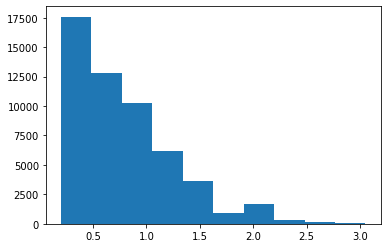

In [156]:
plt.hist(x)
plt.show()

## QQ-plot

When the quantiles of two variables are plotted against each other, then the plot obtained is known as quantile – quantile plot or qqplot. This plot provides a summary of whether the distributions of two variables are similar or not with respect to the locations. (ref: GFG)

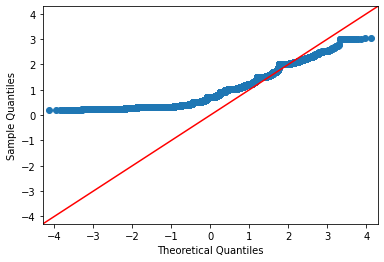

In [157]:
# paramter explaination: 45
# If all point of quantiles lie on or close to straight line at an angle of 45 degree from x – axis, It indicates that two samples have similar distributions.
sm.qqplot(x, line = '45');

The samples don't share the same distribution

## D-agostino K-squared normal test
Null hypothesis: x comes from a normal distribution.

p-value of less than alpha (usually 0.05) indicates null hypothesis is so unlikely to be true.

In [158]:
from scipy.stats import normaltest

def check_is_normal(x):
    k2, pval = normaltest(x)
    alpha = 1e-3

    print('p-value is {:g}'.format(pval))
    print(f"Which means the null hypothesis can{'' if pval < alpha else 'not'} be rejected")

In [159]:
check_is_normal(x)

p-value is 0
Which means the null hypothesis can be rejected


We'll now generate a random distributed data to test validity of this test 

In [160]:
check_is_normal(np.random.normal(0, 1, 1000))

p-value is 0.896273
Which means the null hypothesis cannot be rejected


## 3-2 Column dependency

CHI-SQUARE test null hypothesis: the two variables are not related
It works by comparing observed and expected frequencies

In [178]:
features.keys()

Index(['carat', 'cut', 'clarity', 'depth', 'table', 'z', 'xy', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

In [179]:
from scipy.stats import chi2_contingency

def is_independant(cols, alpha=0.05):
    # Create a cross tab which is a contigency table
#     cols = scale_data(cols).to_numpy()
    data_cont = pd.crosstab(cols[:,0], cols[:,1])
    stat, p_value , dof, expected = chi2_contingency(data_cont)

    print(p_value)
    
    if p_value <= alpha:
        # reject h0
        print('the first and second columns are dependent')
    else:
        # h0 most likely holds true
        print('the first and second columns are independent')

In [180]:
is_independant(data[['carat', 'price']].to_numpy())

0.0
the first and second columns are dependent


In [181]:
is_independant(
    np.vstack((data['z']+4, 2*data['z'])).transpose()
)

0.0
the first and second columns are dependent


In [183]:
is_independant(raw_data[['Unnamed: 0', 'carat']].to_numpy())

0.4799273285726053
the first and second columns are independent


As expected, ID and weight are two independant features

## 3-3 Column distribtution

SKIPPED lognorm distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED lomax distribution (taking more than 30 seconds)
SKIPPED mielke distribution (taking more than 30 seconds)
SKIPPED ncf distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)


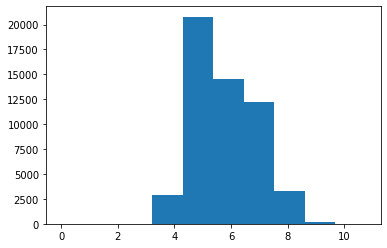

SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED norminvgauss distribution (taking more than 30 seconds)


In [187]:
x = raw_data['x']
plt.hist(x)
plt.show()

We're going to use a package to try different distributions

In [ ]:
! pip3 install fitter

In [ ]:
from fitter import Fitter

f = Fitter(x)
f.fit()
f.summary()

## 3-4 T-stat, F-stat

In [188]:
import statsmodels.api as sm

x, y = [data[['carat', 'z']].to_numpy()[:,i] for i in range(2)]
pred = sm.OLS(y, x).fit()
print(pred.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                          4.070e+05
Date:                Wed, 08 Feb 2023   Prob (F-statistic):                        0.00
Time:                        23:09:45   Log-Likelihood:                         -87109.
No. Observations:               53591   AIC:                                  1.742e+05
Df Residuals:                   53590   BIC:                                  1.742e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

An R2 close to 1 means the two columns are linearly dependant, and a big F-statistic implies the results are significant. Very low P-Value would reject the null hypothesis of independence. 